Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0424 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0176 - val_loss: 0.0150 - learning_rate: 0.0010
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0151 - val_loss: 0.0161 - learning_rate: 0.0010
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0145 - val_loss: 0.0145 - learning_rate: 0.0010
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0157 - val_loss: 0.0145 - learning_rate: 0.0010
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0178 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 7/30
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0145
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0145 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0157 - val_loss: 0.0159 - learning_rate: 5.0000e-04
E

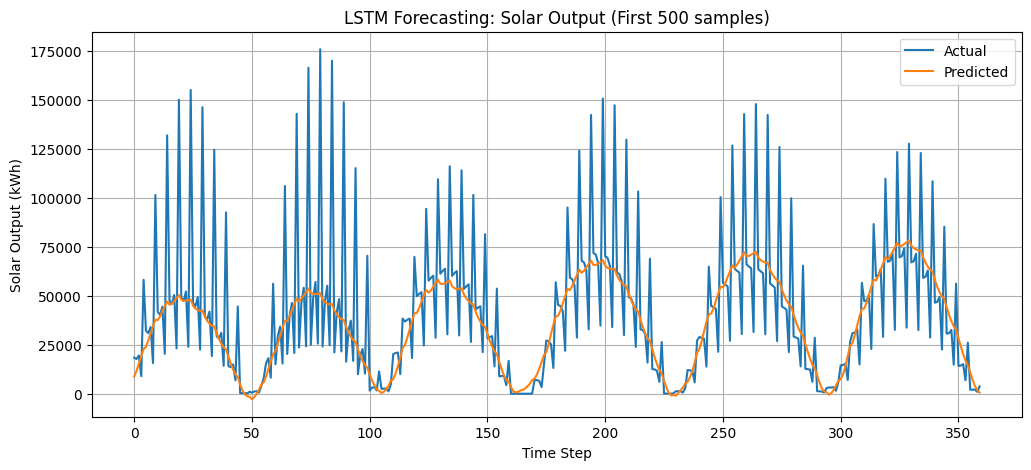

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
weather_df = pd.read_excel("/content/Averaged Weather.xlsx")
solar_2022 = pd.read_excel("/content/Solar_Generation_Outputs_2022_Transformed.xlsx")
solar_2023 = pd.read_excel("/content/Solar_Generation_Outputs_2023_Transformed.xlsx")
solar_2024 = pd.read_excel("/content/Solar_Generation_Outputs_2024_Transformed.xlsx")
solar_df = pd.concat([solar_2022, solar_2023, solar_2024], ignore_index=True)
merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner')
merged = merged.dropna()

merged = merged.drop(columns=['Installation'])

merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
merged = merged.dropna()
features = merged.drop(columns=['Year', 'Month', 'Hour', 'Solar_Output_kWh'])
target = merged['Solar_Output_kWh']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))


def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)


X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), # Stacked LSTM layers
    Dropout(0.2),

    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[lr_reduction], verbose=1)

y_pred_scaled = model.predict(X_val).flatten()

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_val_original = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_val_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
r2 = r2_score(y_val_original, y_pred)
mape = mean_absolute_percentage_error(y_val_original, y_pred)

print(f"LSTM Performance → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

plt.figure(figsize=(12, 5))
plt.plot(y_val_original[:500], label='Actual')
plt.plot(y_pred[:500], label='Predicted')
plt.title("LSTM Forecasting: Solar Output (First 500 samples)")
plt.xlabel("Time Step")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0256 - val_loss: 0.0200 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0155 - val_loss: 0.0168 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0126 - val_loss: 0.0154 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0136 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 0.0148 - val_loss: 0.0189 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0151 - val_loss: 0.0192 - learning_rate: 0.0010
Epoch 7/50
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0159
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0158 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0132 - val_loss: 0.0149 - learning_rate: 5.0000e-04

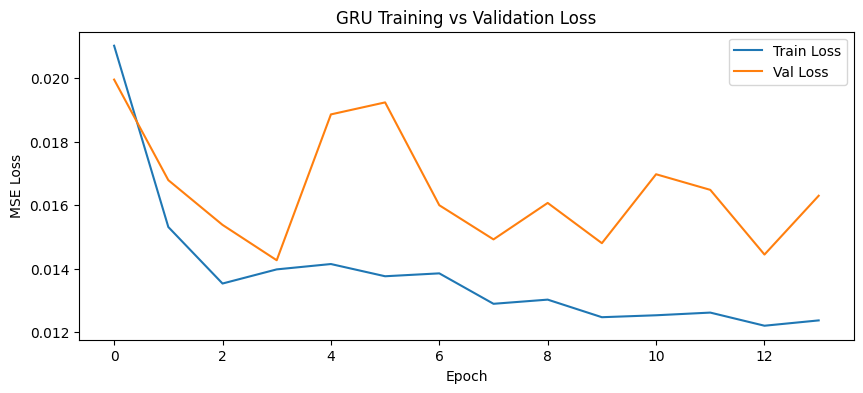

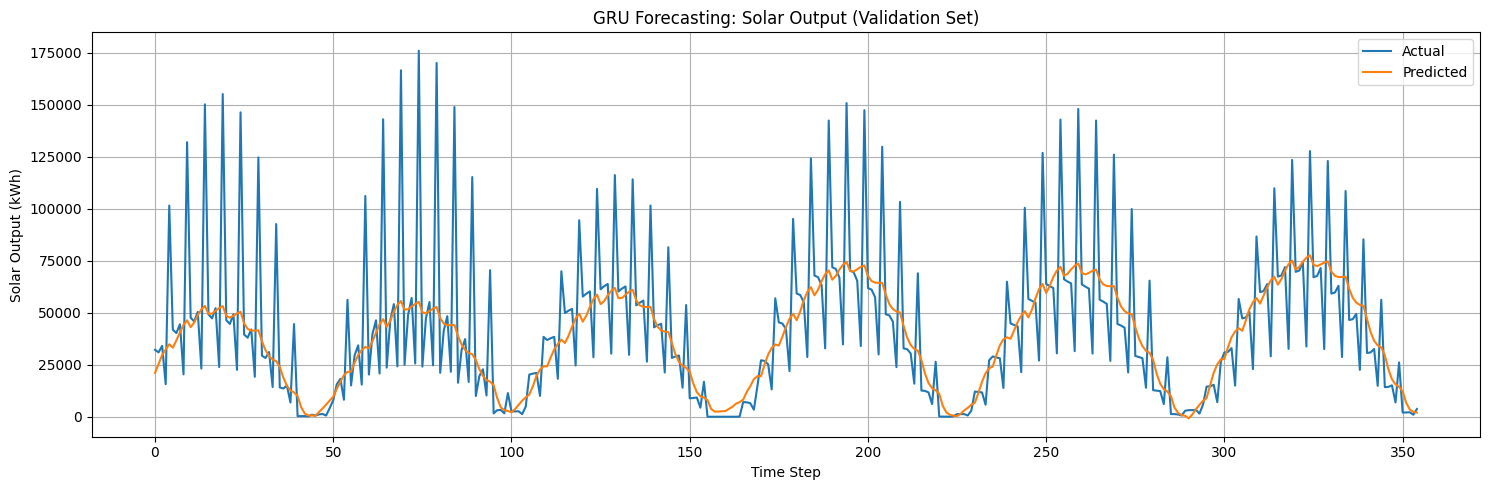

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
weather_df = pd.read_excel("/content/Averaged Weather.xlsx")
solar_2022 = pd.read_excel("/content/Solar_Generation_Outputs_2022_Transformed.xlsx")
solar_2023 = pd.read_excel("/content/Solar_Generation_Outputs_2023_Transformed.xlsx")
solar_2024 = pd.read_excel("/content/Solar_Generation_Outputs_2024_Transformed.xlsx")
solar_df = pd.concat([solar_2022, solar_2023, solar_2024], ignore_index=True)
merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner').dropna()
merged = merged.drop(columns=['Installation'])
merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
merged = merged.dropna()
features = merged.drop(columns=['Year', 'Month', 'Hour', 'Solar_Output_kWh'])
target   = merged['Solar_Output_kWh']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1,1))

def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)

X_train, X_val, y_train, y_val = train_test_split(
    X_seq, y_seq, test_size=0.2, shuffle=False
)

model = Sequential([
    GRU(128, activation='tanh', return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
)
early_stop = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[lr_reduction, early_stop],
    verbose=1
)


y_pred_scaled = model.predict(X_val).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = scaler_y.inverse_transform(y_val.reshape(-1,1)).flatten()


mae   = mean_absolute_error(y_true, y_pred)
rmse  = np.sqrt(mean_squared_error(y_true, y_pred))
r2    = r2_score(y_true, y_pred)
mape  = mean_absolute_percentage_error(y_true, y_pred)*100

print(f"GRU Performance → MAE: {mae:.2f}, RMSE: {rmse:.2f}, "
      f"R²: {r2:.4f}, MAPE: {mape:.2f}%")


plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("GRU Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("GRU Forecasting: Solar Output (Validation Set)")
plt.xlabel("Time Step")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0636 - val_loss: 0.0241 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0369 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0327 - val_loss: 0.0214 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0287 - val_loss: 0.0251 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0247 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0264 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0250 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0201 - val_loss: 0.0213 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0230 - val_loss: 0.0223 - learning_rate: 0.0010
Epoch 10/50
21/23 ━

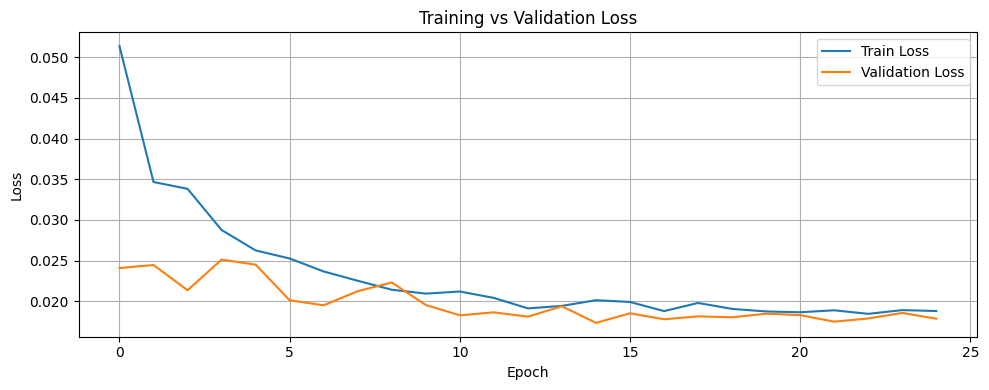

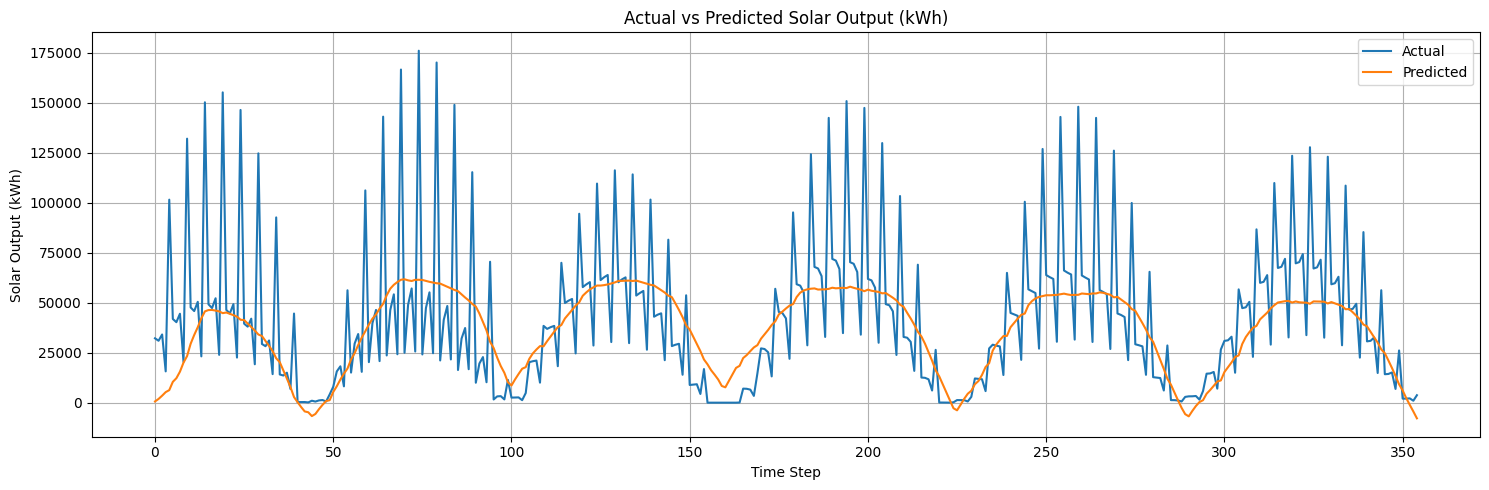

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D, Add
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
weather_df = pd.read_excel("/content/Averaged Weather.xlsx")
solar_2022 = pd.read_excel("/content/Solar_Generation_Outputs_2022_Transformed.xlsx")
solar_2023 = pd.read_excel("/content/Solar_Generation_Outputs_2023_Transformed.xlsx")
solar_2024 = pd.read_excel("/content/Solar_Generation_Outputs_2024_Transformed.xlsx")
solar_df = pd.concat([solar_2022, solar_2023, solar_2024], ignore_index=True)
merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner')
merged = merged.drop(columns=['Installation'], errors='ignore')
merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
merged = merged.dropna()
features = merged.drop(columns=['Year', 'Month', 'Hour', 'Solar_Output_kWh'])
target = merged['Solar_Output_kWh']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))
def create_sequences(X, y, seq_len=24):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i + seq_len])
        ys.append(y[i + seq_len])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = Add()([attention, inputs])
    x = LayerNormalization(epsilon=1e-6)(attention)

    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    out = Add()([x, ff])
    return LayerNormalization(epsilon=1e-6)(out)
input_shape = X_train.shape[1:]
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.2)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="mse")
lr_schedule = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[lr_schedule, early_stop],
    verbose=1
)
y_pred_scaled = model.predict(X_val).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"\nTransformer Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Solar Output (kWh)")
plt.xlabel("Time Step")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
